### Series de tiempo Santo Domingo

En este documento analizaré la serie de tiempo de Santo Domingo ya decodificada la información en formato "SYNOP". \
En particular estoy interesado en analizar la serie de tiempo de nubosidad y viento para los años del 2000 al 2022. Dentro de estos años espero encontrar algunos casos de estudio que valgan la pena para visualizar con la información satelital, especialmente dentro de los años del 2020 al 2022 donde hay disponibilidad de imagenes GOES 16. \
Con la info de nubes GOES y algun dataset de viento quiero ver si en estos casos de estudio se cumple alguna relación causal entre el viento y la nubosidad. Vientos primero y despues nubes? o alrevez?. 
Quizas tocar la SST también, pero por el momento acá solo trabajaré lo que pueda encontrar de la estación. \
Algunas preguntas de interés serían las siguientes:


1) En la costa de Chile central, ¿los vientos de la tarde son mayores cuando amanece despejado? 
2) ¿El viento intenso se lleva las nubes y se despeja, o al despejarse se intensifican los vientos?
3) ¿Es la diferencia de temperatura entre tierra y océano el mecanismo responsable de la intensificación del viento por las tardes? 
4) ¿Este feedback nubosidad/viento se favorece en alguna estación del año?, ¿cual es su variabilidad anual? 
5) ¿Que ocurre con el ciclo diurno del viento y nubosidad cuando en la costa cuando hay anomalías interestacionales de SST? ¿Que efecto tienen los pulsos/filamentos de surgencia en la nubosidad y vientos?
6) ¿La nubosidad se ve favorecida en las Puntas de las bahías? e.g Zapallar, Lengua de Vaca, Choros, Patache, etc ¿Porqué?


---

In [2]:
#Importar paquetes
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import windrose

In [3]:
#Cargar datos stodomingo ya procesados en formato .csv
paths = glob('data/sto_domingo/datos/stodomingo*')  #rutas
stodomingo = [pd.read_csv(p, index_col=0, parse_dates=True) for p in paths] #cargar tablas
stodomingo = pd.concat(stodomingo).sort_index() #pegarlas
stodomingo.index = stodomingo.index - pd.Timedelta(hours=4) #cambiar hora a UTC-4
stodomingo = stodomingo.reindex(pd.date_range("2000-01-01","2022-12-31", freq='h')) #rellenar con NaN los días sin dato
stodomingo['cloudcover'] = stodomingo['cloudcover'].where(stodomingo.cloudcover<=8) #Sacar valores de nubosidad mayor a 8 octas >:(
# stodomingo.dropna(how='all')

---

Ahora que esta la data cargada en la memoria, veamos que pasa con la serie de tiempo de nubosidad

In [4]:
#Ver disponibilidad de info en la estación por hora
x = (~np.isnan(stodomingo.cloudcover))
x.groupby(x.index.hour).sum()/22

0       0.000000
1       0.000000
2       0.227273
3       0.000000
4       0.000000
5       0.090909
6       0.045455
7       0.045455
8     359.272727
9       0.045455
10      0.045455
11    345.772727
12      0.090909
13      0.090909
14    361.090909
15      0.045455
16      0.090909
17    337.545455
18      0.045455
19      0.045455
20    300.136364
21      0.000000
22      0.000000
23      0.227273
Name: cloudcover, dtype: float64

La tabla de arriba me está diciendo que sólo hay datos para las siguientes horas del día: 8hrs, 11 hrs, 14 hrs, 17 hrs, 20 hrs, asi que con estos datos estamos ciegos por las noches :(. \
En particular la series están casi llenas para las horas antes dichas excepto la serie de datos de las 20 hrs que está con mayor agujero pero también hay hartos datos. Veamos como se ven las series de tiempo para más detalle...


Text(0.0, 1.0, 'Nubosidad')

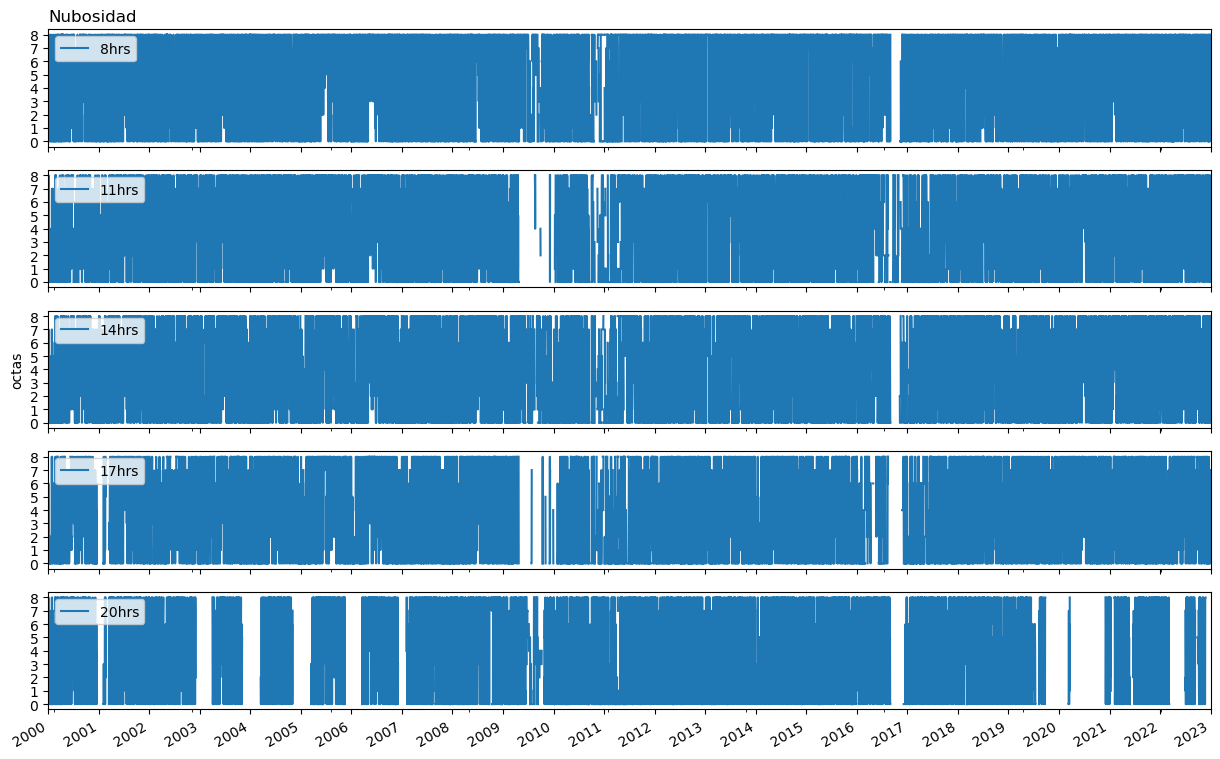

In [4]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')
myloc = mdates.MonthLocator(interval=12)

fig, ax = plt.subplots(5,1, sharex=True, sharey=True, figsize=(15,10))
colors = plt.cm.bone(np.linspace(0.2,0.8,5))
for i,h in enumerate([8,11,14,17,20]):
    x = stodomingo.cloudcover
    x = x[x.index.hour==h]
    x.plot(ax=ax[i], label=str(h)+'hrs')
    ax[i].legend(loc='upper left', frameon=True)
    ax[i].set_yticks(np.arange(9))
    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].xaxis.set_major_locator(myloc)
    ax[i].set_xlim("2000","2023")
ax[2].set_ylabel('octas')
ax[0].set_title('Nubosidad', loc='left')

Claro, en general estan todas las horas bien llenitas, excepto las 20 hrs (tarde/noche), especialmente en el periodo del 2020-2022... Pero aun así el año 2021 parece estar completo en todas las horas. Lo que no es malo pensando en el GOES !! Igual algo de estadística se puede hacer con estos 20 años, en particular quiero ver si en verdad las mañanas son mas nubosas que las tardes y que rol tienen los estratocúmulos en la climatología de nubosidad... Ver si hay algun feedback con el viento y ahí buscar casos de estudio para los ultimos años.

Text(0.0, 1.0, 'Frecuencia de nubosidad según hora del dia.\nPeríodo 2000-2022')

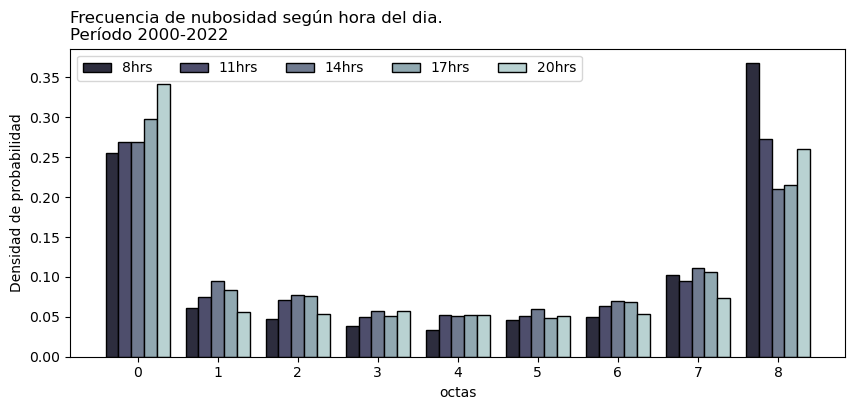

In [5]:
fig = plt.figure(figsize=(10,4))
ax = plt.gca()
colors = plt.cm.bone(np.linspace(0.2,0.8,5))
ax.hist([stodomingo[stodomingo.index.hour==i].cloudcover for i in [8,11,14,17,20]], bins=np.arange(0,10,1),
        edgecolor='k', density=True, color=colors, label=['8hrs','11hrs','14hrs','17hrs','20hrs'])
ax.set_xticks(np.arange(9)+0.5)
ax.set_xticklabels(np.arange(9))
ax.set_xlabel('octas');
ax.set_ylabel('Densidad de probabilidad')
ax.legend(ncol=5)
ax.set_title('Frecuencia de nubosidad según hora del dia.\nPeríodo 2000-2022', loc='left')

La mayoría de las observaciones dicen que hay 0 octas o bien 8 octas, de manera que podríamos decir que el "observador" suele decir que en la estación está nublado o despejado. También hay observaciones entre 1 y 7 octas pero son menores en comparación a las otras dos. Esto igual tiene algo de sentido ya que se esperarían ver frecuentemente las nubes del estratocúmulo costero, el cual al ser una gran nube en el cielo debe cubrir toda la localidad de Santo Domingo cuando está presente. \

Otra observación es que suele estar mas nublado por las mañanas que por las tardes. En las observaciones de 8 octas (cielo completamente cubierto) hay notoriamente más registros a las 8 hrs que las 20 hrs.
Mientras que las observaciones de 0 octas se dominan principalmente a las 20 hrs (las tardes estan mas despejadas).

Separemos ahora la serie de tiempo en tardes (17hrs) y mañanas (8hrs) despejadas/nubladas, definiendo horas nubladas como aquellas donde hay 6 octas o más. Y grafiquemos la climatología de tardes/mañanas nubladas considerando también cuando el observador indica que las nubes son estratocúmulos o no!.

In [6]:
tardes  = (stodomingo.cloudcover[stodomingo.index.hour==17])
tardes  = pd.Series(np.where(np.isnan(tardes), np.nan, tardes>=6), index=tardes.index)

mañanas = (stodomingo.cloudcover[stodomingo.index.hour==8])
mañanas = pd.Series(np.where(np.isnan(mañanas), np.nan, mañanas>=6), index=mañanas.index)

Text(0, 0.5, '% del mes nublado\n(promedio 22 años)')

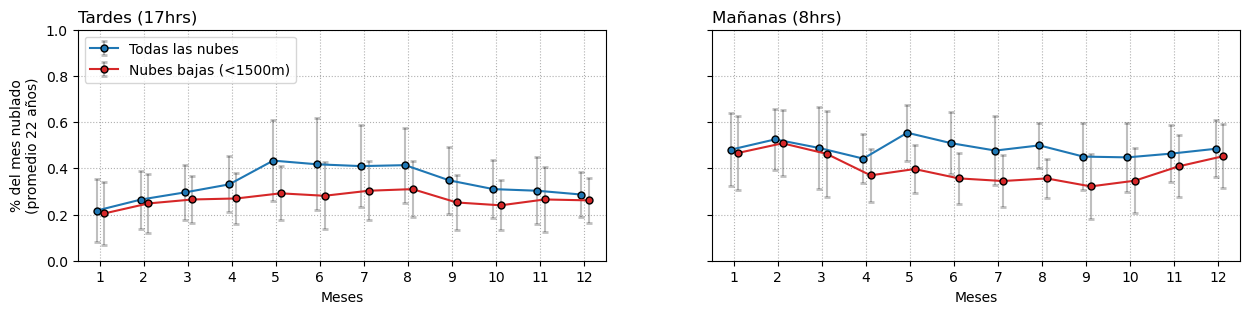

In [7]:
from scipy.stats import t
fig, ax = plt.subplots(1,2, sharex=True, figsize=(15,3), sharey=True)

colors=['tab:blue', 'tab:red']
labels=['Todas las nubes', 'Nubes bajas (<1500m)']
titles=['Tardes (17hrs)','Mañanas (8hrs)']
for j,data in enumerate([stodomingo[stodomingo.index.hour==17], stodomingo[stodomingo.index.hour==8]]):
    axis = ax[j]
    for k,v in enumerate([np.inf, 1500]):
        means,std,N = [],[],[]
        for i,group in data.groupby(data.index.month):
            group = group.cloudcover.where(group.basecloud<=v)>=6
            n = len(group.dropna())
            m = ((group).groupby(group.index.year).sum()/(~np.isnan(group)).groupby(group.index.year).sum()).mean()
            s = ((group).groupby(group.index.year).sum()/(~np.isnan(group)).groupby(group.index.year).sum()).std()
            means.append(m)
            std.append(s)
            N.append(n)
        means = np.array(means)
        std   = np.array(std)
        N     = np.array(N)   
        ts    = np.array([t.ppf(0.975, df=n-1) for n in N])
        
        markers, caps, bars = axis.errorbar(np.arange(1,13)+(k+1)/6-0.225, means, yerr=std,
                    capsize=2.5, color=colors[k], marker='o', mec='k',
                    markersize=5, label=labels[k], capthick=2, ecolor='k')
        [bar.set_alpha(0.25) for bar in bars]
        [cap.set_alpha(0.25) for cap in caps]

    axis.set_title(titles[j], loc='left')
    axis.set_xlim(0.5,12.5)
    axis.set_xticks(np.arange(1,13))
    axis.set_xlabel('Meses')
    axis.grid(True, ls=":")
    axis.set_ylim(0,1)


ax[0].legend(loc='upper left')
ax[0].set_ylabel('% del mes nublado\n(promedio 22 años)')

La figura superior muestra que % del mes, en promedio, se encuentra nublado (nublado = 6 octas o más). El panel izquierdo considera sólo las tardes y el panel derecho sólo las mañanas. Para cada figura se muestra una curva azul y una roja, donde la primera indica el % de nubes (promedio anual mas desviación estándar) cuando se consideran todas las nubes, y la segunda sólo cuando se consideran las nubes bajas, es decir, cuando el observador determinó que la base de las nubes estan a alturas inferiores a 1500m. 

Dicho esto, a partir de la figura se extrae la siguiente información:

1) La variabilidad diaria o interanual es muy importante ($\sigma$ es del orden de $\bar{x}$).
2) Las mañanas son mas nubosas que las tardes independiente de mes del año
3) Los inviernos son mas nubosos que los veranos (que sorpresa), especialmente porque las tardes de invierno son mas nubosas.
3) El ciclo estacional de la __nubosidad total__ esta mejor definido por las tardes que por las mañanas.
4) El ciclo estacional de las __nubes bajas__ esta mejor definido por las mañanas que por las tardes.
5) Durante los meses de Noviembre a Marzo la nubosidad está mayoritariamente dominada por nubes bajas. En el resto del año se observa una mayor diversidad de altura de nubes
6) En primavera/verano hay más nubes bajas por la mañana que en el resto del año.


---

Ahora que conozco un poco que contiene la serie de tiempo de nubosidad analizaré que ocurre con los vientos en la estación.

Para los datos de viento tengo un numero similar de datos en las mismas horas que la nubosidad, aunque tambien algo de viento por las noches hay (igual poco). Veamos las series de tiempo de viento

In [5]:
stodomingo = stodomingo.where(stodomingo.windspeed<stodomingo.windspeed.std()*4) #quito los outliers

Text(0.0, 1.0, 'Magnitud del viento')

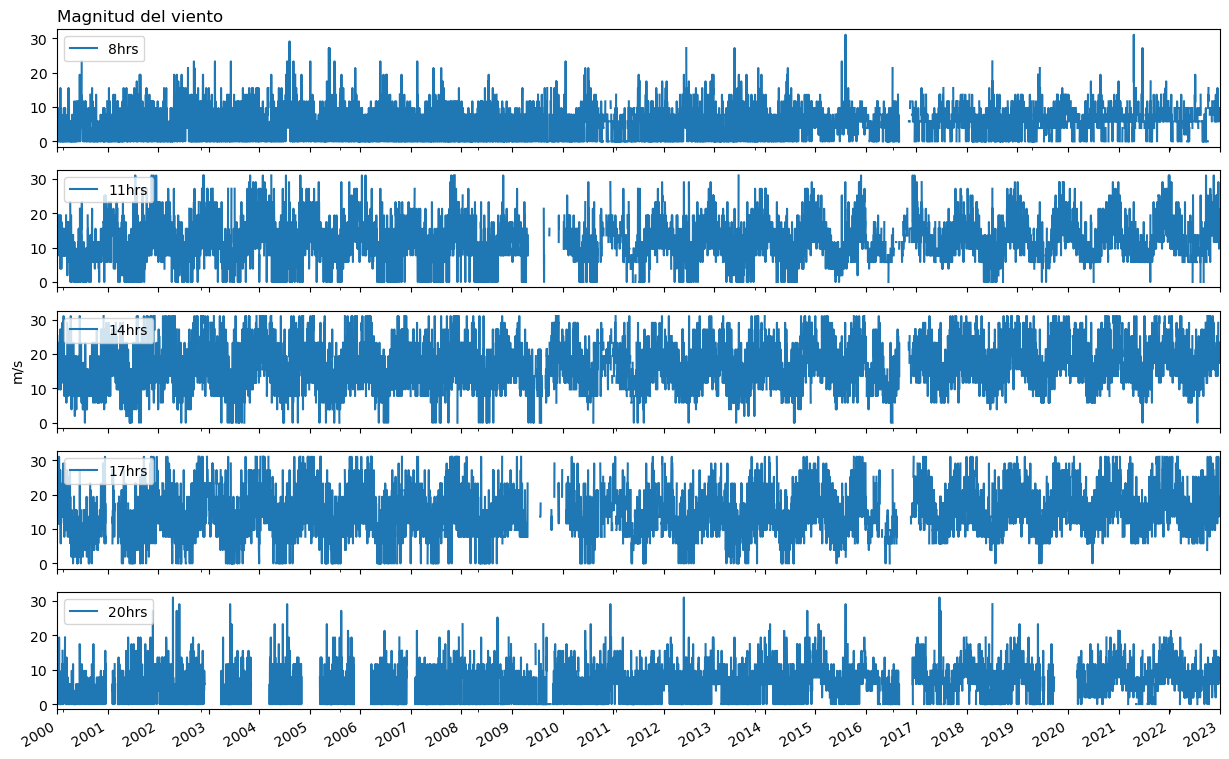

In [6]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y')
myloc = mdates.MonthLocator(interval=12)

fig, ax = plt.subplots(5,1, sharex=True, sharey=True, figsize=(15,10))
colors = plt.cm.bone(np.linspace(0.2,0.8,5))
for i,h in enumerate([8,11,14,17,20]):
    x = stodomingo.windspeed
    x = x[x.index.hour==h]
    x.plot(ax=ax[i], label=str(h)+'hrs')
    ax[i].legend(loc='upper left', frameon=True)

    ax[i].xaxis.set_major_formatter(myFmt)
    ax[i].xaxis.set_major_locator(myloc)
    ax[i].set_xlim("2000","2023")
ax[2].set_ylabel('m/s')
ax[0].set_title('Magnitud del viento', loc='left')

A grandes rasgos se observa que hay hartos datos en todas las horas. Además pareciera que los vientos de las 14/17 hrs son mas intensos que a las 8hrs y 20hrs. Se ve un notorio ciclo estacional en el viento. Se ve bastante discreta la serie de tiempo, probablemente porque del reporte SYNOP el viento estaba valores enteros (nudos). Veamos en mas detalle la climatología y distribuciones...

Viento promedio a las 8hrs: 7.76 (m/s)
Viento promedio a las 11hrs: 12.47 (m/s)
Viento promedio a las 14hrs: 16.63 (m/s)
Viento promedio a las 17hrs: 14.85 (m/s)
Viento promedio a las 20hrs: 8.41 (m/s)


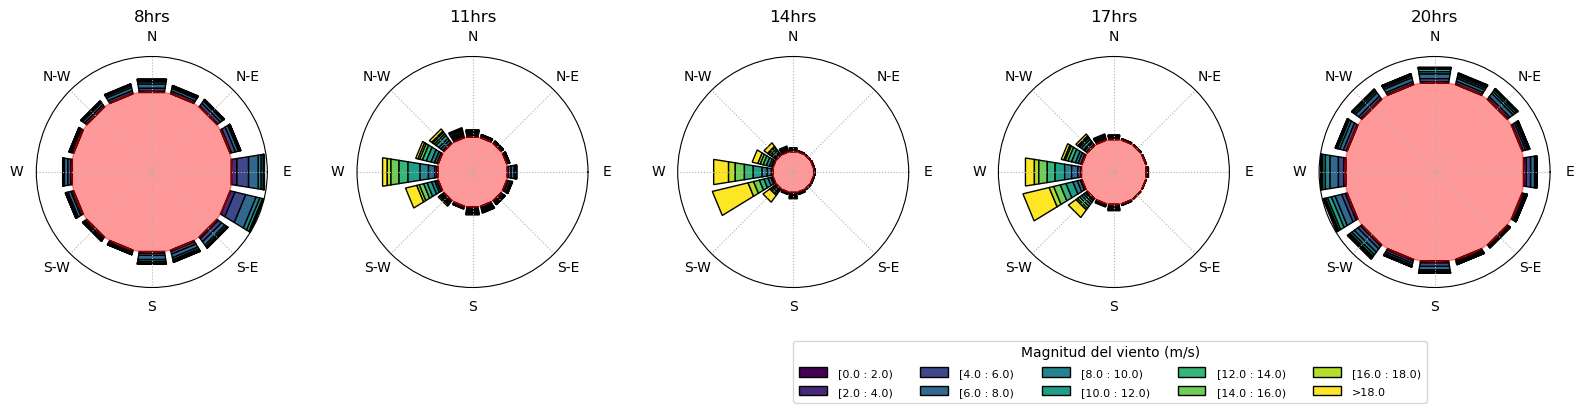

In [8]:
fig, ax = plt.subplots(1,5, sharex=True, sharey=True, figsize=(20,3), subplot_kw={'projection':'windrose'})

for i, h in enumerate([8,11,14,17,20]):
    wd,ws = stodomingo.winddir, stodomingo.windspeed
    wd,ws = wd[wd.index.hour==h],ws[ws.index.hour==h]
    c = ax[i].bar(wd, ws, normed=True, bins=np.arange(0,20, 2), zorder=3, edgecolor='k', calm_limit=0.5)
    print("Viento promedio a las "+str(h)+"hrs: {:.2f} (m/s)".format(ws.where(ws>0.5).mean()))
    ax[i].grid(True, ls=":")
    ax[i].set_title('{:d}hrs'.format(h))
    ax[i].set_yticks([])

ax[2].set_legend(ncol=5, loc=(0.5,-0.5), title='Magnitud del viento (m/s)')

La figura se arriba muestra las rosas de viento para las distintas horas del día. La rosa del viento esta mostrando la dirección predominante del viento, el eje radial es una medida de la frecuencia en la que se observa esa dirección, y en colores se indica la magnitud. El círculo rosado indica los períodos de calma (definidos como $||\vec{v}|| \leq 0.5$ m/s). 

De la figura se extrae que a las 8 y 20 hrs ocurren mayoritariamente situaciones de calma. Si es que se detectan vientos significativos estos son muy débiles y rara vez superan los 6 m/s. Estos vientos débiles se observan venir practicamente de cualquier dirección, pero en los casos de mayor magnitud (desde 6 m/s en adelante) se observa que por la mañana son provenientes del este/sureste y por la tarde del oeste/suroeste, lo cual es consistente con la dinámica de las brisas marinas. Vientos del mar al continente en el día (20 hrs) y del continente al mar por la noche (8 hrs). 

Con respecto a los eventos de mayor magnitud, estos se observan durante el día principalmente a las 14 y 17 hrs. La dirección predominante del viento es del oeste/suroeste, donde no es extraño observar eventos de magnitud superior a 15 m/s (~7.7 nudos). A grandes rasgos la figura nos permite decir que un día "ventoso" sería aquel con vientos mayores a 18 m/s, los que generalmente vienen del sur-oeste.

Veamos ahora como se ve la variación estacional de los vientos, para eso tomaré sólo la serie de las 14 hrs que es la hora del día donde se suele alcanzar el máximo diario...

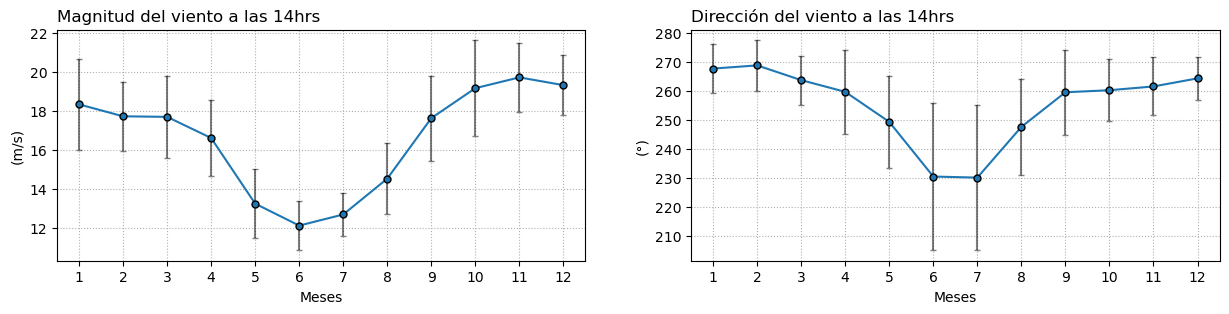

In [11]:
fig, ax = plt.subplots(1,2, sharex=True, figsize=(15,3))


x = stodomingo[stodomingo.index.hour==14]
x = [x.windspeed, x.winddir]
ylabels=['(m/s)','(°)']
titles=['Magnitud del viento a las 14hrs', 'Dirección del viento a las 14hrs']
for j,v in enumerate(x):
    axis = ax[j]
    data=v.copy()
    means,std,N,ts=[],[],[],[]
    for i,group in data.groupby(data.index.month):
        n = len(group.dropna())
        m = ((group).groupby(group.index.year).sum()/(~np.isnan(group)).groupby(group.index.year).sum()).mean()
        s = ((group).groupby(group.index.year).sum()/(~np.isnan(group)).groupby(group.index.year).sum()).std()
        means.append(m)
        std.append(s)
        N.append(n)
    means = np.array(means)
    std   = np.array(std)
    N     = np.array(N)   
    ts    = np.array([t.ppf(0.975, df=n-1) for n in N])

    markers, caps,bars=axis.errorbar(np.arange(1,13), means, yerr=std,
                capsize=2.5, marker='o', mec='k',
                markersize=5, ecolor='k')
    

    [bar.set_alpha(0.5) for bar in bars]
    [cap.set_alpha(0.5) for cap in caps]

    axis.set_title(titles[j], loc='left')
    axis.set_xlim(0.5,12.5)
    axis.set_xticks(np.arange(1,13))
    axis.set_xlabel('Meses')
    axis.grid(True, ls=":")
    axis.set_ylabel(ylabels[j])


Al igual que en el caso de la nubosidad, podemos extraer de la climatología la siguiente información:

0) La variabilidad diaria o interanual es importante. ($\sigma$ comparable con $\bar{x}$)
1) La variabilidad de la magnitud del viento es similar mes a mes, aunque levemente menor en los meses de invierno. La dirección se observa ser más variable, ya que los meses de invierno muestran notoriamente una mayor varianza respecto a los demás meses del año. Lo cuál es consistente con la sinóptica activada del invierno (anticiclón debilitado da el espacio para que el storm track afecte estas latitudes)
2) El viento sopla mayoritariamente desde el oeste/suroeste, siendo la componente sur mas importante en el invierno, y en el verano mas importante la componente del oeste. Probalmente hay mucha influencia de las brisas marinas y de la orientación de la línea de costa en la dirección del viento...
3) Los vientos son menores en magnitud en los meses de invierno, alcanzandose los máximos en primavera y verano (máximo anual en noviembre).

---

Con estos antecedentes climatológicos de la estación de Santo Domingo estoy en condiciones para ver si realmente los días en que amanece despejado de nubes bajas el viento por la tarde es notoriamente más intenso.

In [12]:
mañanasdespejadas = (1-mañanas.copy()).resample('d').mean()
tardesdespejadas  = (1-tardes).resample('d').mean()
diasnubesbajas    = (stodomingo.basecloud[stodomingo.index.hour==8]<=1500).resample('d').mean()

primverano        = (mañanasdespejadas.index.month==11) | (mañanasdespejadas.index.month==12) | (mañanasdespejadas.index.month==1) | (mañanasdespejadas.index.month==2) | (mañanasdespejadas.index.month==3)
primverano        = pd.Series(primverano, index=mañanasdespejadas.index)

winds = (stodomingo[stodomingo.index.hour==17].windspeed).resample('d').mean().loc[primverano]
winds = winds.where(winds>1)

13.33128205128205
16.814294205052004
16.212857142857143
19.593025125628138


Text(0.0, 1.0, 'Magnitud del viento a las 17 hrs para los meses de Noviembre a Marzo')

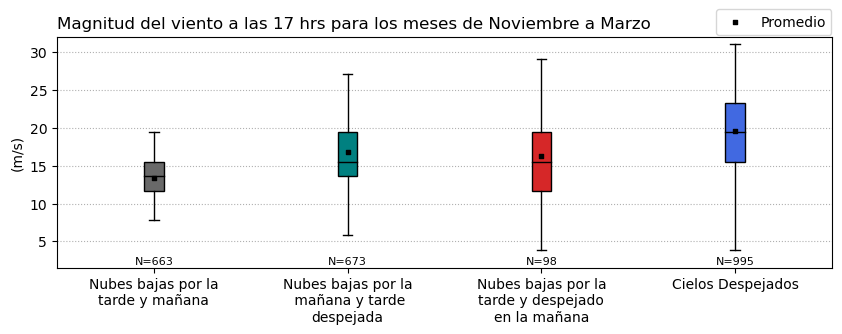

In [13]:

labels=['Nubes bajas por la\ntarde y mañana', 'Nubes bajas por la\n mañana y tarde\ndespejada', 'Nubes bajas por la\ntarde y despejado\nen la mañana', 'Cielos Despejados']

plt.figure(figsize=(10,3))
data = [winds.where((mañanasdespejadas==0) & (tardesdespejadas==0) & (diasnubesbajas==1)),
        winds.where((mañanasdespejadas==0) & (tardesdespejadas==1) & (diasnubesbajas==1)),
        winds.where((mañanasdespejadas==1) & (tardesdespejadas==0) & (diasnubesbajas==0)),
        winds.where((mañanasdespejadas==1) & (tardesdespejadas==1) & (diasnubesbajas==0))]

colors=['dimgrey','teal','tab:red','royalblue']
for i,d in enumerate(data):
    plt.boxplot(d.dropna(), positions=[i], sym='', patch_artist=True, medianprops={'color':'k'},
                boxprops={'facecolor':colors[i]}, widths=0.1)
    plt.text(i,2,'N={:d}'.format(d.dropna().size), ha='center', fontsize=8)
    plt.ylim(1.5,32)

plt.scatter([0,1,2,3],[d.mean() for d in data],
            zorder=3, color='k', marker='s',s=5, label='Promedio')
[print(d.mean()) for d in data]
plt.legend(loc=(0.85,1.01))
plt.grid(axis='y', ls=":")
ax = plt.gca()
ax.set_xticklabels(labels)
plt.ylabel('(m/s)')
plt.title('Magnitud del viento a las 17 hrs para los meses de Noviembre a Marzo', loc='left')

Los boxplots de arriba muestran la variabilidad del viento a las 14 hrs en días que se cumplen distintas condiciones de nubosidad. En primer lugar el número de días nublados, sin nubes y con nubes solo por la mañana es bastante comparable (~600), pero los días en que está despejado por la mañana y nublado por la tarde son bastante inusuales (98 veces) por lo que cuidado con la comparación. 

Ya considerando eso, pareciera ser significativo que los días sin nubes tienen mayores vientos que los días nublados y quizás los días sólo nublados por la mañana en efecto tienen menores vientos también que días despejados. Pero para estar 100% seguro mejor veo que dice una prueba de t-student...

In [14]:
from scipy.stats import ttest_ind

dianublado     = data[0].dropna()
nubesmañana    = data[1].dropna()
nubestarde     = data[2].dropna()
cielodespejado = data[3].dropna()

print('t-test días nublados vs días despejados:                                   ',ttest_ind(dianublado, cielodespejado))
print('t-test días nublados vs días nublados por la mañana:                       ',ttest_ind(dianublado, nubesmañana))
print('t-test días nublados vs días nublados por la tarde:                        ',ttest_ind(dianublado, nubestarde))
print('\n')

print('t-test días nublados por la mañana vs días despejados:                     ',ttest_ind(nubesmañana, cielodespejado))
print('t-test días nublados por la mañana vs días nublados por la tarde:          ',ttest_ind(nubesmañana, nubestarde))

print('\n')
print('t-test días nublados por la tarde vs días despejados:                      ',ttest_ind(nubestarde, cielodespejado))

t-test días nublados vs días despejados:                                    Ttest_indResult(statistic=-22.71371460015519, pvalue=1.2025305920203524e-99)
t-test días nublados vs días nublados por la mañana:                        Ttest_indResult(statistic=-13.683821168841959, pvalue=5.541277282587238e-40)
t-test días nublados vs días nublados por la tarde:                         Ttest_indResult(statistic=-6.198975681198532, pvalue=9.323128201989082e-10)


t-test días nublados por la mañana vs días despejados:                      Ttest_indResult(statistic=-9.466889134643175, pvalue=9.474864409358776e-21)
t-test días nublados por la mañana vs días nublados por la tarde:           Ttest_indResult(statistic=1.0508033512216666, pvalue=0.29367901420254855)


t-test días nublados por la tarde vs días despejados:                       Ttest_indResult(statistic=-5.099677680984267, pvalue=4.009340851425943e-07)


Considerando que hay diferencias significativas cuando $pvalue<0.05$ (arbitrario), se ve que en efecto los días despejados tienen un viento en promedio mayor que en días nublados, y que días nublados sólo por la mañana. Curiosamente el viento en días sólo nublados por la mañana no es en promedio distinto al viento en días nublados sólo por la tarde, por lo que la afirmación "amanece despejado ergo habrá viento en la tarde" no necesariamente se cumple si es que se nubla durante el día, aunque igual hay que tener en cuenta que la situación en que amanece despejado y se nubla en la tarde es bastante poco frecuente. Todas las demás combinaciones muestran diferencias significativas.

---

Ahora que tengo las máscaras de los días nublados, nublados sólo por la mañana y días 100% despejados voy a buscar algunos casos de estudio ... 

In [15]:
#Amplitud del ciclo diurno
x = stodomingo.windspeed.resample('d').max()-stodomingo.windspeed.resample('d').min()
# x = pd.Series(x, index=stodomingo[stodomingo.index.hour==12].index)
# #Dias con amplitud positiva ()
x = x.where(x>0).where(primverano)
# x.where(((diasnubesbajas==1) & (mañanasdespejadas==0) & (tardesdespejadas==0)))["2020":].dropna().sort_values().loc["2022"]


(0.0, 360.0)

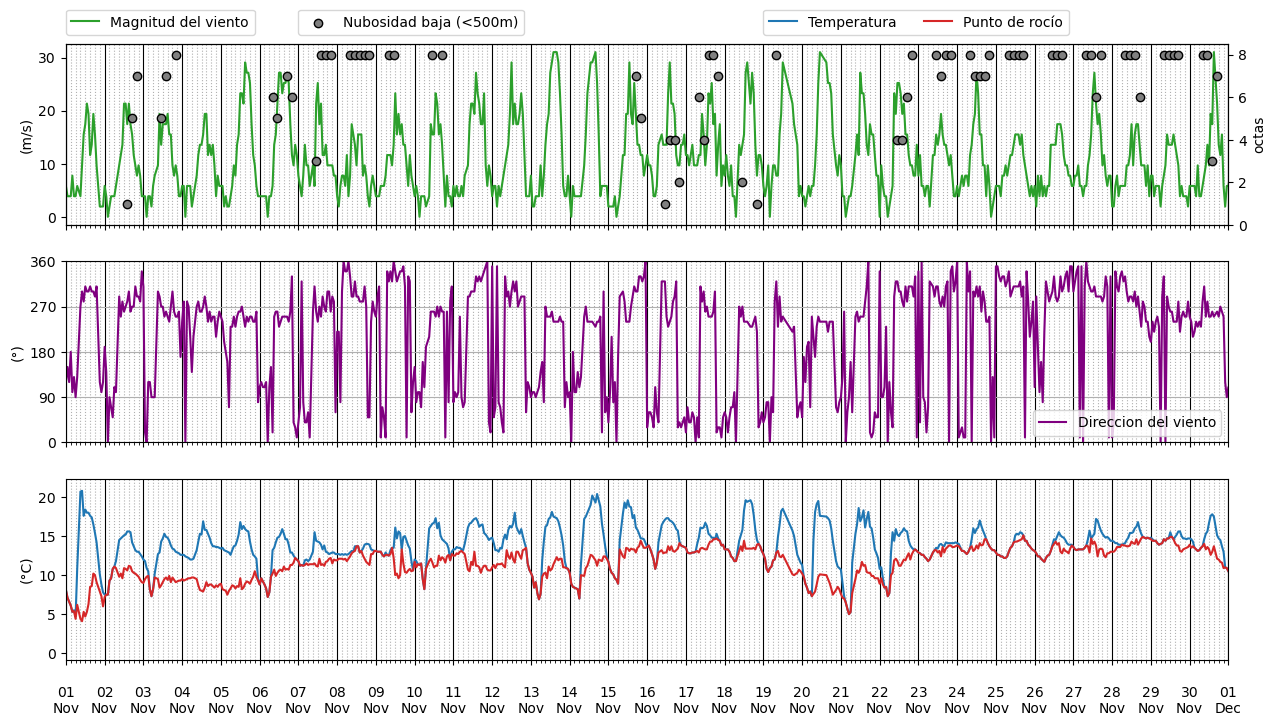

In [11]:

x = stodomingo.loc["2022-10-30":"2022-12-02"]

dd = (stodomingo.basecloud.resample('d').min()>500)
dd = dd.where(dd).loc[x.index[0]:x.index[-1]].astype(float)*0.5
dd.index = dd.index+pd.Timedelta(hours=12)

fig, ax = plt.subplots(3,1, sharex=True, figsize=(15,8))
ax[0].plot(x.index,x.windspeed.interpolate(), color='tab:green', label='Magnitud del viento')
ax1 = ax[0].twinx()
ax1.scatter(x.index,x.cloudcover.where(x.basecloud<=500), color='grey', edgecolors='k', label='Nubosidad baja (<500m)')
ax1.set_ylim(0,8.5)

ax[2].plot(x.index,x.temp.interpolate(), color='tab:blue',label='Temperatura')
ax[2].plot(x.index, x.dewpoint.interpolate(), color='tab:red',label='Punto de rocío')
# ax1.scatter(dd.index,dd, marker='*', s=100, color='gold', ec='k', label='Dias despejados')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("\n%d\n%b"))
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax[0].xaxis.set_minor_formatter(mdates.DateFormatter(''))
ax[0].xaxis.set_minor_locator(mdates.HourLocator(byhour=[3,6,9,12,15,18,21]))
for axis in ax:
    axis.grid(True, ls=":", which='minor')
    axis.grid(True, which='major', color='k', axis='x')
    axis.set_xlim(axis.get_xticks().min()+1, axis.get_xticks().max()-1)

    
ax[0].legend(loc=(0,1.05))  
ax[2].legend(loc=(0.6,3.45), ncol=2)
ax1.legend(loc=(0.2,1.05),ncol=2)
ax1.set_ylabel('octas')
ax[0].set_ylabel('(m/s)')
ax[2].set_ylabel('(°C)')

ax[1].plot(x.index,x.winddir.interpolate(), color='purple', label='Direccion del viento')
ax[1].set_ylabel('(°)')
ax[1].legend()
ax[1].set_yticks([0,90,180,270,360])
ax[1].grid(axis='y')
ax[1].set_ylim(0,360)
# ax[0].set_xlim(x.loc["2021-03-20"].index,x.loc["2021-03-25"].index)

Luego de buscar dias en varias combinaciones de nubosidad baja por la mañana, despejado, amplitud del ciclo diurno grande/pequeña, voy a tomar el mes de noviembre del 2022 (y en adelante) para descargar imagenes GOES y estudiar más en detalle los ciclos diurnos. A pesar de que el ciclo diurno no es de alta resolución en la estación (datos en horas 8, 11, 14, 17), se puede ver que durante este mes ocurrieron varios eventos de interés para el proyecto. Se observan varios dias de nubes bajas con vientos débiles, días despejados con vientos fuertes y días nublados con vientos significativos. Además observando la temperatura se infiere también una actividad sinóptica regular (variabilidad semanal). 